---
# Install the required packages

If needed install the following packages:

In [43]:
!pip install tensorflow keras

  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.7 MB/s eta 0:00:004.8 MB/s eta 0:00:01
Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl (24.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.1 MB/s eta 0:00:004.5 MB/s eta 0:00:01
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [22]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01


---
# Imports

In [67]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of **R peak interval** for a patient. Your task involves employing deep learning methods to forecast the **required measurements**. To accomplish this you will be using a patient's ECG measurements from the MITDB database, which consists of the following values:

- R peak Interval (int: the time the R peak appeared)
- Beat Annotation (string: the beat type)
- Episode Annotation (string: the episode type)

**Note: You are required to perform this laboratory assignment on your local machine.**


# Read the data

You are required to load the given data from the `201_cleaned.ann` file (csv format). Load the data into a `pandas dataframe` and display the first 5 rows of the dataframe.

In [2]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('../datasets/201_cleaned.ann')
df.head()

,R peak Interval,Beat Annotation,Episode Annotation
0,55,N,(AFIB
1,144,N,(AFIB
2,238,N,(AFIB
3,314,N,(AFIB
4,412,N,(AFIB


---
# EDA

## Explore the Beat Annotation Distribution

<Axes: xlabel='Beat Annotation', ylabel='Count'>

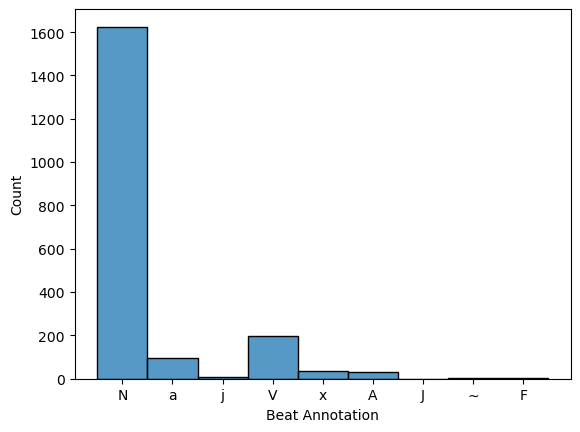

In [3]:
sns.histplot(df['Beat Annotation'])

## Explore the Episode Annotation Distribution

<Axes: xlabel='Episode Annotation', ylabel='Count'>

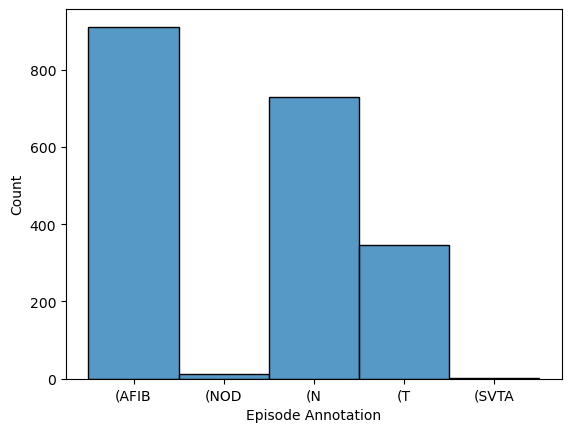

In [4]:
# Write your code here. Add as many boxes as you need.
sns.histplot(df['Episode Annotation'])

---
# Feature Engineering

## Re-Labeling the data (Beat Annotation)

Re-label the data into 3 beat types:
- Normal Beat (N)
- Ventricular Beat (V)
- Other Beats (Other)

In [5]:
# Write your code here. Add as many boxes as you need.
mapping = {
    'N': 'Normal Beat',
    'V': 'Ventricular Beat'
}
df['Beat Annotation'] = df['Beat Annotation'].apply(lambda x: mapping.get(x, 'Other'))
print(df['Beat Annotation'].unique())


['Normal Beat' 'Other' 'Ventricular Beat']


Check that the mapping worked:

<Axes: xlabel='Beat Annotation', ylabel='Count'>

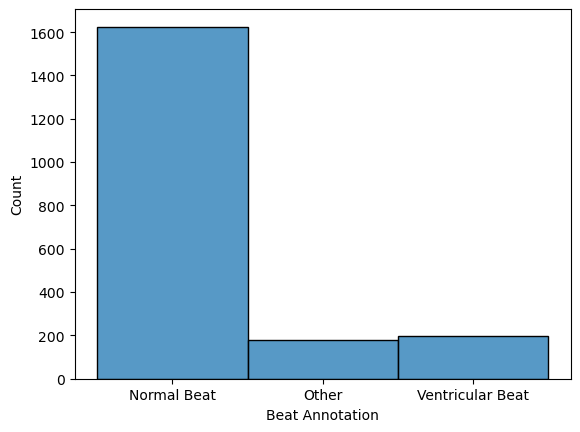

In [6]:
# Write your code here. Add as many boxes as you need.
sns.histplot(df['Beat Annotation'])


## Re-Labeling the data (Episode Annotation)

Re-label the data into 3 beat types:
- Normal Episode: (N
- Atrial Fibrillation: (AFIB
- Other Episode: (Other

In [7]:
# Write your code here. Add as many boxes as you need.
mapping_2 = {
    "(N":"Normal Episode",
    "(AFIB":"Atrial Fibrillation"
}

df['Episode Annotation'] = df['Episode Annotation'].apply(lambda x: mapping_2.get(x, 'Other Episode'))
print(df['Episode Annotation'].unique())

['Atrial Fibrillation' 'Other Episode' 'Normal Episode']


Check that the mapping worked:

<Axes: xlabel='Episode Annotation', ylabel='Count'>

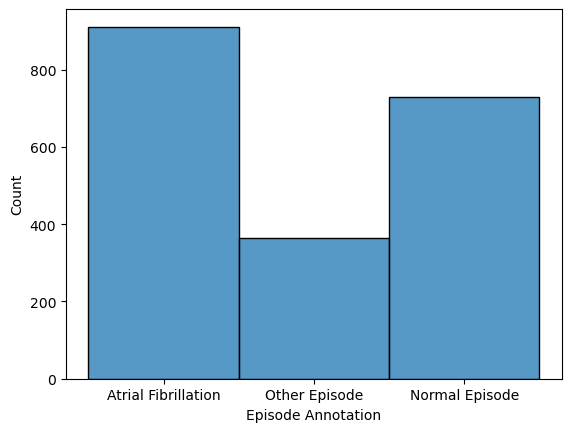

In [8]:
# Write your code here. Add as many boxes as you need.
sns.histplot(df['Episode Annotation'])

## Create Lag Features (5 prev values) for R peak Interval measurement

Apply a lag for the R peak Interval, creating a set of features representing the historical patient data. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [9]:
# Write your code here. Add as many boxes as you need.
lag = 5

In [10]:
periods = range(lag, 0, -1)

In [11]:
df_with_lag = df['R peak Interval'].shift(periods)

Check that the mapping worked:

In [12]:
# Write your code here. Add as many boxes as you need.
df_with_lag

,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,55.0
2,NaN,NaN,NaN,55.0,144.0
3,NaN,NaN,55.0,144.0,238.0
4,NaN,55.0,144.0,238.0,314.0
...,...,...,...,...,...
1999,224485.0,224545.0,224739.0,224764.0,224987.0
2000,224545.0,224739.0,224764.0,224987.0,225145.0
2001,224739.0,224764.0,224987.0,225145.0,225206.0
2002,224764.0,224987.0,225145.0,225206.0,225383.0


In [13]:
df = pd.concat([df, df_with_lag], axis=1)

In [14]:
df.head()

,R peak Interval,Beat Annotation,Episode Annotation,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1
0,55,Normal Beat,Atrial Fibrillation,NaN,NaN,NaN,NaN,NaN
1,144,Normal Beat,Atrial Fibrillation,NaN,NaN,NaN,NaN,55.0
2,238,Normal Beat,Atrial Fibrillation,NaN,NaN,NaN,55.0,144.0
3,314,Normal Beat,Atrial Fibrillation,NaN,NaN,55.0,144.0,238.0
4,412,Normal Beat,Atrial Fibrillation,NaN,55.0,144.0,238.0,314.0


In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
df.sample(5)

,R peak Interval,Beat Annotation,Episode Annotation,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1
1398,161251,Normal Beat,Normal Episode,160470.0,160667.0,160809.0,160964.0,161091.0
1125,124986,Normal Beat,Normal Episode,124341.0,124413.0,124563.0,124700.0,124825.0
266,22329,Normal Beat,Atrial Fibrillation,21932.0,21995.0,22088.0,22162.0,22251.0
40,3475,Normal Beat,Atrial Fibrillation,3009.0,3097.0,3165.0,3246.0,3347.0
1790,207139,Normal Beat,Atrial Fibrillation,206719.0,206793.0,206893.0,206956.0,207065.0


## Generate R-R interval features


For the past 5 R peak intervals ($R_{i}, i \in \{-1, -2, -3, -4, -5\}$), generate the 4 R-R intervals as features.

$RR_{i} = R_{i} - R_{i-1}$

In [17]:
# Write your code here. Add as many boxes as you need.
for i in range(1, 5):
    df[f'RR {i}'] = df[f'R peak Interval_{i}'] - df[f'R peak Interval_{i+1}']

In [18]:
df

,R peak Interval,Beat Annotation,Episode Annotation,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1,RR 1,RR 2,RR 3,RR 4
5,493,Normal Beat,Atrial Fibrillation,55.0,144.0,238.0,314.0,412.0,98.0,76.0,94.0,89.0
6,562,Normal Beat,Atrial Fibrillation,144.0,238.0,314.0,412.0,493.0,81.0,98.0,76.0,94.0
7,682,Normal Beat,Atrial Fibrillation,238.0,314.0,412.0,493.0,562.0,69.0,81.0,98.0,76.0
8,776,Normal Beat,Atrial Fibrillation,314.0,412.0,493.0,562.0,682.0,120.0,69.0,81.0,98.0
9,866,Normal Beat,Atrial Fibrillation,412.0,493.0,562.0,682.0,776.0,94.0,120.0,69.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1999,225145,Normal Beat,Normal Episode,224485.0,224545.0,224739.0,224764.0,224987.0,223.0,25.0,194.0,60.0
2000,225206,Other,Normal Episode,224545.0,224739.0,224764.0,224987.0,225145.0,158.0,223.0,25.0,194.0
2001,225383,Normal Beat,Normal Episode,224739.0,224764.0,224987.0,225145.0,225206.0,61.0,158.0,223.0,25.0
2002,225410,Other,Normal Episode,224764.0,224987.0,225145.0,225206.0,225383.0,177.0,61.0,158.0,223.0


Additionally, generate the current R-R Interval, which we will be using as a target.  

$RR_{curr} = (R_{0} - R_{-1})$

In [19]:
# Write your code here. Add as many boxes as you need.
df['RR'] = df['R peak Interval'] - df['R peak Interval_1']

Check that the mapping worked:

In [20]:
# Write your code here. Add as many boxes as you need.
df

,R peak Interval,Beat Annotation,Episode Annotation,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1,RR 1,RR 2,RR 3,RR 4,RR
5,493,Normal Beat,Atrial Fibrillation,55.0,144.0,238.0,314.0,412.0,98.0,76.0,94.0,89.0,81.0
6,562,Normal Beat,Atrial Fibrillation,144.0,238.0,314.0,412.0,493.0,81.0,98.0,76.0,94.0,69.0
7,682,Normal Beat,Atrial Fibrillation,238.0,314.0,412.0,493.0,562.0,69.0,81.0,98.0,76.0,120.0
8,776,Normal Beat,Atrial Fibrillation,314.0,412.0,493.0,562.0,682.0,120.0,69.0,81.0,98.0,94.0
9,866,Normal Beat,Atrial Fibrillation,412.0,493.0,562.0,682.0,776.0,94.0,120.0,69.0,81.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,225145,Normal Beat,Normal Episode,224485.0,224545.0,224739.0,224764.0,224987.0,223.0,25.0,194.0,60.0,158.0
2000,225206,Other,Normal Episode,224545.0,224739.0,224764.0,224987.0,225145.0,158.0,223.0,25.0,194.0,61.0
2001,225383,Normal Beat,Normal Episode,224739.0,224764.0,224987.0,225145.0,225206.0,61.0,158.0,223.0,25.0,177.0
2002,225410,Other,Normal Episode,224764.0,224987.0,225145.0,225206.0,225383.0,177.0,61.0,158.0,223.0,27.0


## Encode the categorical variables

In [24]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [25]:
beat_enc = OrdinalEncoder()
episode_enc = OrdinalEncoder()

df['Beat Annotation'] = beat_enc.fit_transform(df[['Beat Annotation']])
df['Episode Annotation'] = episode_enc.fit_transform(df[['Episode Annotation']])

Check that the mapping worked:

In [27]:
# Write your code here. Add as many boxes as you need.
df.sample(5)

,R peak Interval,Beat Annotation,Episode Annotation,R peak Interval_5,R peak Interval_4,R peak Interval_3,R peak Interval_2,R peak Interval_1,RR 1,RR 2,RR 3,RR 4,RR
1998,224987,0.0,1.0,224323.0,224485.0,224545.0,224739.0,224764.0,25.0,194.0,60.0,162.0,223.0
247,20780,0.0,0.0,20339.0,20419.0,20514.0,20601.0,20692.0,91.0,87.0,95.0,80.0,88.0
1228,138504,1.0,1.0,137952.0,138073.0,138132.0,138290.0,138360.0,70.0,158.0,59.0,121.0,144.0
1116,123763,2.0,2.0,123058.0,123205.0,123310.0,123493.0,123636.0,143.0,183.0,105.0,147.0,127.0
1131,125749,1.0,1.0,125138.0,125245.0,125407.0,125557.0,125688.0,131.0,150.0,162.0,107.0,61.0


---
# Model Training

## Remove unnecessary columns

For the purposes of training we will only be using the following columns as features:
- Beat Annotation
- Episode Annotation
- **All historical** 4 RR intervals

Moreover, the target column we will be forcasting is the ```current RR``` interval.

In [31]:
# Write your code here. Add as many boxes as you need.
needed_columns = ['Beat Annotation','Episode Annotation','RR 1','RR 2','RR 3','RR 4','RR']

In [35]:
df = df.loc[:,needed_columns]
df

,Beat Annotation,Episode Annotation,RR 1,RR 2,RR 3,RR 4,RR
5,0.0,0.0,98.0,76.0,94.0,89.0,81.0
6,0.0,0.0,81.0,98.0,76.0,94.0,69.0
7,0.0,0.0,69.0,81.0,98.0,76.0,120.0
8,0.0,0.0,120.0,69.0,81.0,98.0,94.0
9,0.0,0.0,94.0,120.0,69.0,81.0,90.0
...,...,...,...,...,...,...,...
1999,0.0,1.0,223.0,25.0,194.0,60.0,158.0
2000,1.0,1.0,158.0,223.0,25.0,194.0,61.0
2001,0.0,1.0,61.0,158.0,223.0,25.0,177.0
2002,1.0,1.0,177.0,61.0,158.0,223.0,27.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [38]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X = df.drop(['RR'],axis=1)
Y = df['RR']

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

## Neural Network (RNN / CRNN)

Create a deep (convolutional) recurrent neural network using:
- Minimum of 1 Convolutional Layer **(+2 points Optional)** and
- Minimum of 1 LSTM Layer

In [47]:
# Write your code here. Add as many boxes as you need.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Input
from tensorflow.keras.layers import LSTM

model = Sequential()

In [49]:
model.add(Input(shape=(X_train.shape[1],1)))
model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

In [56]:
model_2 = Sequential()

In [57]:
model_2.add(Input(shape=(X_train.shape[1], 1)))
model_2.add(LSTM(50, activation='relu', return_sequences=True))
model_2.add(LSTM(50, activation='relu'))

model_2.add(Dense(1))

**Reshape Data If Necessary**

In [58]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

Compile and fit the model (Run only train 3 Epoch).

In [60]:
# Write your code here. Add as many boxes as you need.
# Compile the model
model.compile(optimizer='adam', loss='mse')
model_2.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, Y_train, epochs=3)
model_2.fit(X_train, Y_train, epochs=3)

Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 11710.1895
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1794.6151
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1523.7546
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10322.5088
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1412.2316
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1265.1008


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 5, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 2, 50)          │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,331 (509.11 KB)

 Trainable params: 43,443 (169.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,888 (339.41 KB)

In [62]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 6, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

---
# Model Evaluation

Use the trained model to make predictions for the test set.

In [65]:
# Write your code here. Add as many boxes as you need.

y_pred = model.predict(X_test)
y_pred2 = model_2.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [68]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('R2 Score:', r2_score(Y_test, y_pred))

Root Mean Squared Error: 48.840006555603736
Mean Absolute Error: 31.46668216705322
R2 Score: -0.1503182893256534


In [69]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred2)))
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred2))
print('R2 Score:', r2_score(Y_test, y_pred2))

Root Mean Squared Error: 45.26841695319663
Mean Absolute Error: 28.50199544906616
R2 Score: 0.011771868801113139
